# Airline Passenger Satisfaction Analysis

## I. Overview
This project uses various classification modeling to predict the airline passenger satisfaction after the flight journey.

## II. Business Problem
- How to improve airline customer experience?
***
### Question to Consider:

## III. Data Understanding

In [1]:
import pandas as pd
pd.options.display.max_columns = 25
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv('data/train.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_train.shape)
display(df_train.head())
display(df_train.info())

(103904, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


None

In [3]:
df_test = pd.read_csv('data/test.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_test.shape)
display(df_test.head())
display(df_test.info())

(25976, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
id                                   25976 non-null int64
Gender                               25976 non-null object
Customer Type                        25976 non-null object
Age                                  25976 non-null int64
Type of Travel                       25976 non-null object
Class                                25976 non-null object
Flight Distance                      25976 non-null int64
Inflight wifi service                25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Ease of Online booking               25976 non-null int64
Gate location                        25976 non-null int64
Food and drink                       25976 non-null int64
Online boarding                      25976 non-null int64
Seat comfort                         25976 non-null int64
Inflight entertainment               25976 non-null int64
On-board service 

None

In [4]:
total_rows = df_train.shape[0] + df_test.shape[0]
test_df_size = df_test.shape[0] / total_rows
print(test_df_size)

0.2


### Note:
- Data source https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
- The datasets acquired from kaggel contain train and test sets which have been already split into 80/20. For analysis (ML) purpose, I will combine those two datasets.
- (Some pattern can be only seen at specific part of the dataset)

In [5]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)
display(df.shape)
display(df.head())
display(df.info())

(129880, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64
Inflight entertainment               129880 non-null int64


None

### Description for each columns' abbreviation
- <b>Gender</b> - Gender of the passengers (Female, Male)
- <b>Customer Type</b> - The customer type (Loyal customer, disloyal customer)
- <b>Age</b> - The actual age of the passengers
- <b>Type of Travel</b>: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- <b>Class</b> - Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- <b>Flight distance</b> - The flight distance of this journey
- <b>Inflight wifi service</b> - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- <b>Departure/Arrival time convenient</b> - Satisfaction level of Departure/Arrival time convenient
- <b>Ease of Online booking</b> - Satisfaction level of online booking
- <b>Gate location</b> - Satisfaction level of Gate location
- <b>Food and drink</b> - Satisfaction level of Food and drink
- <b>Online boarding</b> - Satisfaction level of online boarding
- <b>Seat comfort</b> - Satisfaction level of Seat comfort
- <b>Inflight entertainment</b> - Satisfaction level of inflight entertainment
- <b>On-board service</b> - Satisfaction level of On-board service
- <b>Leg room service</b> - Satisfaction level of Leg room service
- <b>Baggage handling</b> - Satisfaction level of baggage handling
- <b>Check-in service</b> - Satisfaction level of Check-in service
- <b>Inflight service</b> - Satisfaction level of inflight service
- <b>Cleanliness</b> - Satisfaction level of Cleanliness
- <b>Departure Delay in Minutes</b> - Minutes delayed when departure
- <b>Arrival Delay in Minutes</b> - Minutes delayed when Arrival
- <b>Satisfaction</b> - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [6]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

>**Insight:** 
- No need to worried about duplicates (same customer can take multiple journey at different time)
- `Gender`, `Customer Type`, `Type of Travel`, and `Class` are either binary or ternary columns
- `Age`, `Flight Distance`, `Departure Dalay in Minutes`, and `Arrival Delay in Minutes` are numeric columns
- From `Inflight wifi service` ... to ... `Cleanliness` are survey columnsthese columns(0:not applicable and 1 to 5)
- Only `Arrival Delay in Minutes` contains null value 

### Target Variable - `satisfaction`

In [7]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

- Binary classifiers
- No imbalance issue

### Predictor Variables

#### Categorical Columns

In [8]:
# cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
# for col in cat_cols:
#     display(pd.DataFrame(df[col].value_counts(normalize=True)))
#     display(pd.DataFrame(df.groupby([col, 'satisfaction'])['satisfaction'].count()))

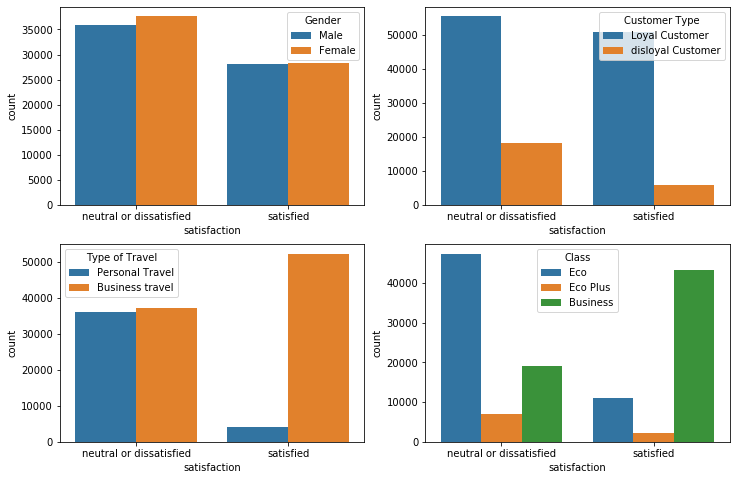

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,8))

sns.countplot(data=df, x='satisfaction', hue='Gender', ax=axes[0,0])

sns.countplot(data=df, x='satisfaction', hue='Customer Type', ax=axes[0,1])

sns.countplot(data=df, x='satisfaction', hue='Type of Travel', ax=axes[1,0])

sns.countplot(data=df, x='satisfaction', hue='Class', hue_order=['Eco', 'Eco Plus', 'Business'], ax=axes[1,1])

plt.show()

- Gender: almost equally distributed for both 0 and 1. No significant relationship. Drop this column
- Customer Type: more loyal than disloyal, more dissatisfied for both group
- Type of Travel: similar dissatified for both, more satisfied in business
- Class: more dissatisfied in eco class, more satisfied in business class

#### Numeric Columns

In [10]:
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[num_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


- `Departure Delay in Minutes` and `Arrival Delay in Minutes` can be changed into binary columns

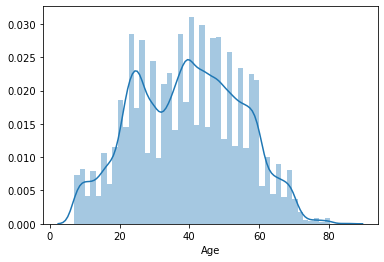

In [11]:
sns.distplot(df['Age'])
plt.show()

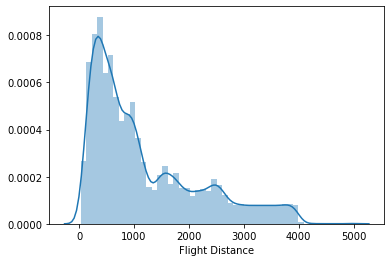

In [12]:
sns.distplot(df['Flight Distance'])
plt.show()

- flight distance -https://en.wikipedia.org/wiki/Flight_length#:~:text=Route%20category%20lengths%20tend%20to,haul%20as%20being%20in%2Dbetween.
- may be change flight distance to short, medium and long haul?
- How late is late? 
- departure / arrival delay less than 10 minues => not significant delay (with tolerance)

In [13]:
# df.loc[df['Departure Delay in Minutes'] <= 10].count()

In [14]:
# (129880-95128)/129880

In [15]:
# df.loc[df['Arrival Delay in Minutes'] <= 10].count()

In [16]:
# df.loc[df['Arrival Delay in Minutes'].isna()].head(20)

In [17]:
print("Null value percentage:", round(df['Arrival Delay in Minutes'].isna().mean()*100, 3), "%")

Null value percentage: 0.303 %


- null value only account for a small percent => drop the null value to 0

#### Survey Columns

In [18]:
for ind, col in enumerate(df.columns):
    print(ind, col)

0 id
1 Gender
2 Customer Type
3 Age
4 Type of Travel
5 Class
6 Flight Distance
7 Inflight wifi service
8 Departure/Arrival time convenient
9 Ease of Online booking
10 Gate location
11 Food and drink
12 Online boarding
13 Seat comfort
14 Inflight entertainment
15 On-board service
16 Leg room service
17 Baggage handling
18 Checkin service
19 Inflight service
20 Cleanliness
21 Departure Delay in Minutes
22 Arrival Delay in Minutes
23 satisfaction


In [19]:
df.columns[7:21]

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [20]:
survey_cols = df.columns[7:21].tolist()
df[survey_cols].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326
std,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
for cols in df.columns[7:21]:
    display(pd.DataFrame(df[cols].value_counts(normalize=True)))

,Inflight wifi service
2,0.248845
3,0.247806
4,0.190753
1,0.171913
5,0.110533
0,0.030151


,Departure/Arrival time convenient
4,0.245457
5,0.215568
3,0.172298
2,0.165799
1,0.149438
0,0.051440


,Ease of Online booking
3,0.234008
2,0.231375
4,0.188204
1,0.168509
5,0.134155
0,0.043748


,Gate location
3,0.275000
4,0.234570
2,0.187065
1,0.169318
5,0.134039
0,0.000008


,Food and drink
4,0.235317
5,0.215253
3,0.213998
2,0.210833
1,0.123583
0,0.001016


,Online boarding
4,0.296181
3,0.208785
5,0.200339
2,0.168879
1,0.102102
0,0.023714


,Seat comfort
4,0.306098
5,0.255297
3,0.179612
2,0.142662
1,0.116323
0,0.000008


,Inflight entertainment
4,0.283269
5,0.242870
3,0.183893
2,0.169141
1,0.120688
0,0.000139


,On-board service
4,0.297990
5,0.227071
3,0.219757
2,0.141292
1,0.113851
0,0.000038


,Leg room service
4,0.276301
5,0.237950
3,0.192917
2,0.188944
1,0.099284
0,0.004604


,Baggage handling
4,0.360032
5,0.260841
3,0.199038
2,0.110579
1,0.069510


,Checkin service
4,0.279743
3,0.272967
5,0.199284
1,0.124022
2,0.123976
0,0.000008


,Inflight service
4,0.364359
5,0.262288
3,0.194918
2,0.110163
1,0.068232
0,0.000038


,Cleanliness
4,0.261541
3,0.235902
5,0.218787
2,0.154858
1,0.128804
0,0.000108


- 0: Not applicable accounts only a small percent for all the survey columns => treat as 1 for better analysis

....Want some pivot table below
- index 0, 1, 2, 3, 4, 5 with dissatisfied and satisfied
- columns : survey columns

In [22]:
for cols in survey_cols:
    display(pd.DataFrame(df.groupby([cols, 'satisfaction'])['satisfaction'].count()))

satisfaction
Inflight wifi service satisfaction                         
0                     neutral or dissatisfied            10
                      satisfied                        3906
1                     neutral or dissatisfied         15000
                      satisfied                        7328
2                     neutral or dissatisfied         24330
                      satisfied                        7990
3                     neutral or dissatisfied         24080
                      satisfied                        8105
4                     neutral or dissatisfied          9891
                      satisfied                       14884
5                     neutral or dissatisfied           141
                      satisfied                       14215

satisfaction
Departure/Arrival time convenient satisfaction                         
0                                 neutral or dissatisfied          3467
                                  satisfied                        3214
1                                 neutral or dissatisfied          9891
                                  satisfied                        9518
2                                 neutral or dissatisfied         11957
                                  satisfied                        9577
3                                 neutral or dissatisfied         12539
                                  satisfied                        9839
4                                 neutral or dissatisfied         19491
                                  satisfied                       12389
5                                 neutral or dissatisfied         16107
                                  satisfied                       11891

satisfaction
Ease of Online booking satisfaction                         
0                      neutral or dissatisfied          1900
                       satisfied                        3782
1                      neutral or dissatisfied         13581
                       satisfied                        8305
2                      neutral or dissatisfied         20931
                       satisfied                        9120
3                      neutral or dissatisfied         20968
                       satisfied                        9425
4                      neutral or dissatisfied         11449
                       satisfied                       12995
5                      neutral or dissatisfied          4623
                       satisfied                       12801

satisfaction
Gate location satisfaction                         
0             satisfied                           1
1             neutral or dissatisfied         11020
              satisfied                       10971
2             neutral or dissatisfied         13028
              satisfied                       11268
3             neutral or dissatisfied         23321
              satisfied                       12396
4             neutral or dissatisfied         18563
              satisfied                       11903
5             neutral or dissatisfied          7520
              satisfied                        9889

satisfaction
Food and drink satisfaction                         
0              neutral or dissatisfied            77
               satisfied                          55
1              neutral or dissatisfied         12848
               satisfied                        3203
2              neutral or dissatisfied         16731
               satisfied                       10652
3              neutral or dissatisfied         16748
               satisfied                       11046
4              neutral or dissatisfied         14492
               satisfied                       16071
5              neutral or dissatisfied         12556
               satisfied                       15401

satisfaction
Online boarding satisfaction                         
0               neutral or dissatisfied          1341
                satisfied                        1739
1               neutral or dissatisfied         11434
                satisfied                        1827
2               neutral or dissatisfied         19422
                satisfied                        2512
3               neutral or dissatisfied         23385
                satisfied                        3732
4               neutral or dissatisfied         14502
                satisfied                       23966
5               neutral or dissatisfied          3368
                satisfied                       22652

satisfaction
Seat comfort satisfaction                         
0            neutral or dissatisfied             1
1            neutral or dissatisfied         11734
             satisfied                        3374
2            neutral or dissatisfied         14341
             satisfied                        4188
3            neutral or dissatisfied         18334
             satisfied                        4994
4            neutral or dissatisfied         17481
             satisfied                       22275
5            neutral or dissatisfied         11561
             satisfied                       21597

satisfaction
Inflight entertainment satisfaction                         
0                      neutral or dissatisfied            18
1                      neutral or dissatisfied         13450
                       satisfied                        2225
2                      neutral or dissatisfied         17296
                       satisfied                        4672
3                      neutral or dissatisfied         17360
                       satisfied                        6524
4                      neutral or dissatisfied         14307
                       satisfied                       22484
5                      neutral or dissatisfied         11021
                       satisfied                       20523

satisfaction
On-board service satisfaction                         
0                neutral or dissatisfied             5
1                neutral or dissatisfied         11879
                 satisfied                        2908
2                neutral or dissatisfied         13663
                 satisfied                        4688
3                neutral or dissatisfied         19463
                 satisfied                        9079
4                neutral or dissatisfied         18013
                 satisfied                       20690
5                neutral or dissatisfied         10429
                 satisfied                       19063

satisfaction
Leg room service satisfaction                         
0                neutral or dissatisfied           392
                 satisfied                         206
1                neutral or dissatisfied         10263
                 satisfied                        2632
2                neutral or dissatisfied         17785
                 satisfied                        6755
3                neutral or dissatisfied         18139
                 satisfied                        6917
4                neutral or dissatisfied         14961
                 satisfied                       20925
5                neutral or dissatisfied         11912
                 satisfied                       18993

satisfaction
Baggage handling satisfaction                         
1                neutral or dissatisfied          6317
                 satisfied                        2711
2                neutral or dissatisfied         10138
                 satisfied                        4224
3                neutral or dissatisfied         19699
                 satisfied                        6152
4                neutral or dissatisfied         24286
                 satisfied                       22475
5                neutral or dissatisfied         13012
                 satisfied                       20866

satisfaction
Checkin service satisfaction                         
0               neutral or dissatisfied             1
1               neutral or dissatisfied         12249
                satisfied                        3859
2               neutral or dissatisfied         12062
                satisfied                        4040
3               neutral or dissatisfied         19471
                satisfied                       15982
4               neutral or dissatisfied         19619
                satisfied                       16714
5               neutral or dissatisfied         10050
                satisfied                       15833

satisfaction
Inflight service satisfaction                         
0                neutral or dissatisfied             5
1                neutral or dissatisfied          6274
                 satisfied                        2588
2                neutral or dissatisfied         10003
                 satisfied                        4305
3                neutral or dissatisfied         19233
                 satisfied                        6083
4                neutral or dissatisfied         24691
                 satisfied                       22632
5                neutral or dissatisfied         13246
                 satisfied                       20820

satisfaction
Cleanliness satisfaction                         
0           neutral or dissatisfied            14
1           neutral or dissatisfied         13434
            satisfied                        3295
2           neutral or dissatisfied         15836
            satisfied                        4277
3           neutral or dissatisfied         17370
            satisfied                       13269
4           neutral or dissatisfied         15786
            satisfied                       18183
5           neutral or dissatisfied         11012
            satisfied                       17404

### Columns need to be cleaned

#### Categorical Columns
- Drop the `id` and `Gender` column

#### Numeric Columns
- `Flight Distance` change to a ternary columns
- `Arrival Delay` drop the null values
- Combine `Departure Delay` and `Arrival Delay`. Change to a binary column. Add up less than 20 minutes => consider as not delayed, otherwise delay. 

#### Survey Columns
- Change 0 to 1

## IV. Data Preparation

In [23]:
data = df.copy()

### Categorical Columns Cleaning
- Drop the `Gender` columns

In [24]:
data.drop(columns=['id', 'Gender'], inplace=True)

### Numerical Columns Cleaning

#### `Flight Distance`
- (Assume the distance is in mile unit) convert mile to km
- Change the column to a ternary column

In [25]:
# 1 mile = 1.609 km
data['Flight Distance'] = data['Flight Distance']*1.609

In [26]:
haul = []

for distance in data['Flight Distance']:
    # short haul less than 1500 km
    if distance <= 1500:
        haul.append("short")
    
    # long haul greater than 4100 km
    elif distance >= 4100:
        haul.append("long")
    
    # medium haul between 1500 and 4100 km    
    else:
        haul.append("medium")

data['Flight Distance'] = haul

In [27]:
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Loyal Customer,25,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#### `Arrival Delay in Minutes`
- Drop the null values

In [28]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [29]:
129880-393

129487

In [30]:
data = data.dropna(axis=0)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
Customer Type                        129487 non-null object
Age                                  129487 non-null int64
Type of Travel                       129487 non-null object
Class                                129487 non-null object
Flight Distance                      129487 non-null object
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-board service                     129487 non-null int64
Leg room service                     129487 non-null int64


#### `Delay`
- Combine the `Departure Delay in Minutes` and `Arrival Delay in Minutes` into a new column: `Status`
- If the total delay is less or equal to 20 minutes, then consider on time. Otherwise, delay.

In [32]:
data['Status'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Status
0,Loyal Customer,13,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,43.0
1,disloyal Customer,25,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,7.0
2,Loyal Customer,26,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0.0
3,Loyal Customer,25,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,20.0
4,Loyal Customer,61,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0.0


In [33]:
status = []

for time in data['Status']:
    if time <= 20:
        status.append("On time")
    else:
        status.append("Delay")

data['Status'] = status

In [34]:
data.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace=True)

In [35]:
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Status
0,Loyal Customer,13,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied,Delay
1,disloyal Customer,25,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied,On time
2,Loyal Customer,26,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied,On time
3,Loyal Customer,25,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied,On time
4,Loyal Customer,61,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied,On time


### Target Column
- `satisfaction` changed to 0 or 1

In [36]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [37]:
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Status
0,Loyal Customer,13,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,Delay
1,disloyal Customer,25,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,On time
2,Loyal Customer,26,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,On time
3,Loyal Customer,25,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,On time
4,Loyal Customer,61,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,On time


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 21 columns):
Customer Type                        129487 non-null object
Age                                  129487 non-null int64
Type of Travel                       129487 non-null object
Class                                129487 non-null object
Flight Distance                      129487 non-null object
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-board service                     129487 non-null int64
Leg room service                     129487 non-null int64


## V. Modeling

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix

### Baseline Model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
target = ['satisfaction']

In [42]:
X = data.drop(columns=['satisfaction'], axis=1)
y = data[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 21 columns):
Customer Type                        129487 non-null object
Age                                  129487 non-null int64
Type of Travel                       129487 non-null object
Class                                129487 non-null object
Flight Distance                      129487 non-null object
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-board service                     129487 non-null int64
Leg room service                     129487 non-null int64


In [45]:
num_cols = []
cat_cols = []

for col in X.columns:
    if X[col].dtype == "object":
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [46]:
print(f"Numerical columns:{num_cols}")
print("\n")
print(f"Categorical columns:{cat_cols}")

Numerical columns:['Age', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


Categorical columns:['Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Status']


In [47]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

ohe_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder())])

In [48]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat_ohe', ohe_transformer, cat_cols)])

In [49]:
clf_lg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression())])

clf_lg.fit(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                           

In [53]:
def evaluate (model, X_train, X_test, y_train, y_test):
    
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    print("Training Scores")
    print("------------")
    print(f"Accuracy: {accuracy_score(y_train, y_train_preds)}")
    print(f"F1 Score: {f1_score(y_train, y_train_preds)}")
    print(f"ROC-AUC: {roc_auc_score(y_train, y_train_preds)}")
    
    print("Test Scores")
    print("-----------")
    print(f"Accuracy: {accuracy_score(y_test, y_test_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_test_preds)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_test_preds)}")
    
    # plot test confusion matrix
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

Training Scores
------------
Accuracy: 0.8744890078772589
F1 Score: 0.8529124280490895
ROC-AUC: 0.8700976174163613
Test Scores
-----------
Accuracy: 0.8753552452736933
F1 Score: 0.8531819670341667
ROC-AUC: 0.8708372292870782


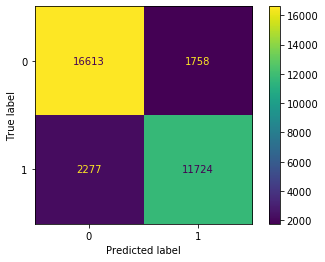

In [54]:
evaluate(clf_lg, X_train, X_test, y_train, y_test)

## VI. Evaluation

## VII. Conclusion